In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
matplotlib.style.use('ggplot')
%matplotlib inline


# Обрабатываем данные

In [3]:
df = pd.read_csv('electricpower.csv', sep=",", header = 0, parse_dates=[1], dayfirst=True)
len(df['DATE'].unique())

730

In [97]:
df = df.groupby(['DATE']).aggregate(sum).reset_index()

In [98]:
#X = df[['day_num'] + ['a'] + ['day_num^2'] + dayofweek_columns + dayofmonth_columns]
# y = df['VALUE']
#X1 = X[(X.index < 723) & (X.index > 620)]
#y1 = y[(y.index < 723) & (y.index > 620)]
#model = LinearRegression()
#model.fit(X1, y1)
# print(X1)

In [99]:
# df.loc[df['HOUR'] == 297]
# print(df)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
new_dates = pd.date_range('2011-01-01', '2011-01-07', freq='D')
# print(new_dates)

In [102]:
new_dates = pd.Index(df['DATE']) | new_dates
df2 = pd.DataFrame({'DATE': new_dates})
df = pd.merge(df, df2, on='DATE', how='right')

In [103]:
df['day_num'] = range(1, len(df) + 1)
df['day_num^2'] = df['day_num'] * df['day_num']

In [104]:
for x in range(1, 366):
    df['day_' + str(x)] = df['DATE'].dt.dayofyear == x

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
for x in range(1, 54):
    df['week_' + str(x)] = df['DATE'].dt.weekofyear == x

In [107]:
for x in range(1, 13):
    df['month_' + str(x)] = df['DATE'].dt.month == x

In [108]:
for x in range(0, 7):
    df['dayofweek_' + str(x)] = df['DATE'].dt.dayofweek == x

In [109]:
for x in range(1, 32):
    df['dayofmonth_' + str(x)] = df['DATE'].dt.day == x

In [124]:
df['a'] = 1
day_columns = ['day_' + str(x) for x in range(2, 366)]
week_columns = ['week_' + str(x) for x in range(1, 54)]
month_columns = ['month_' + str(x) for x in range(1, 13)]
dayofweek_columns = ['dayofweek_' + str(x) for x in range(0, 7)]
dayofmonth_columns = ['dayofmonth_' + str(x) for x in range(1, 32)]
X = df[['day_num'] + ['day_num^2'] + ['a'] + day_columns + week_columns + month_columns + dayofweek_columns + dayofmonth_columns]
y = df['VALUE']
X1 = X[X.index < 730]
y1 = y[y.index < 730]

In [111]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Предсказание общие

In [125]:
model = LinearRegression()
model.fit(X1, y1)

LinearRegression()

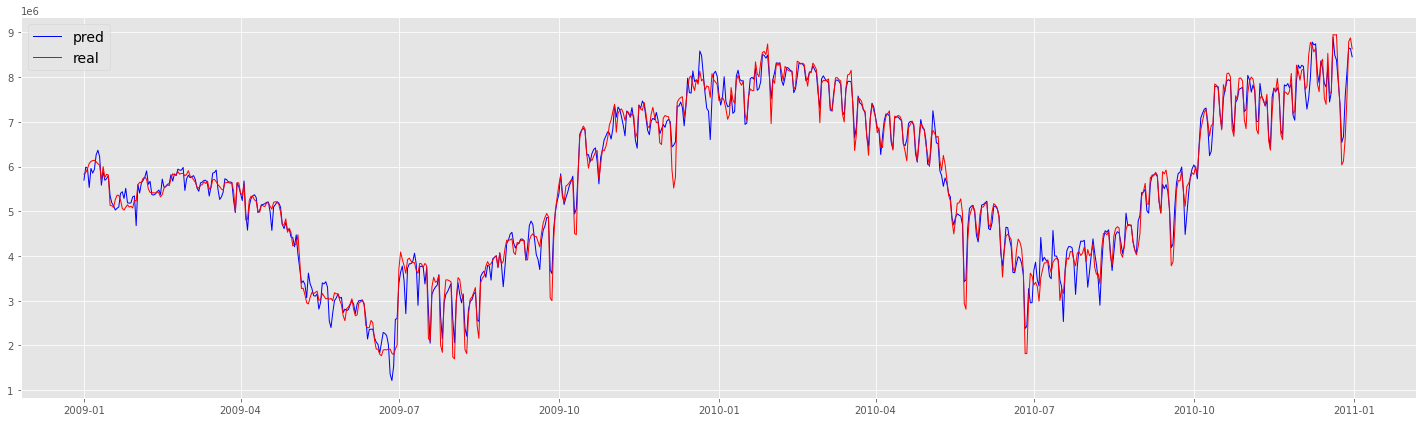

R^2: 0.9805939043004153
MAPE (средняя относительная ошибка прогноза) = 3.900536080219537


In [126]:
d1=df[df['day_num'] < 731]
fig = plt.figure(figsize=(25, 7))
plt.plot(d1['DATE'], model.predict(X1), 'b', linewidth=1, label='pred')
plt.plot(d1['DATE'], y1, 'r', linewidth=1, label='real')
plt.legend(prop={'size': 14})
plt.show()
from sklearn.metrics import mean_absolute_error
print ('R^2: {0}'.format(model.score(X1, y1)))
print("MAPE (средняя относительная ошибка прогноза) =", mean_absolute_percentage_error(y1, model.predict(X1)))

# Уменьшим до недели

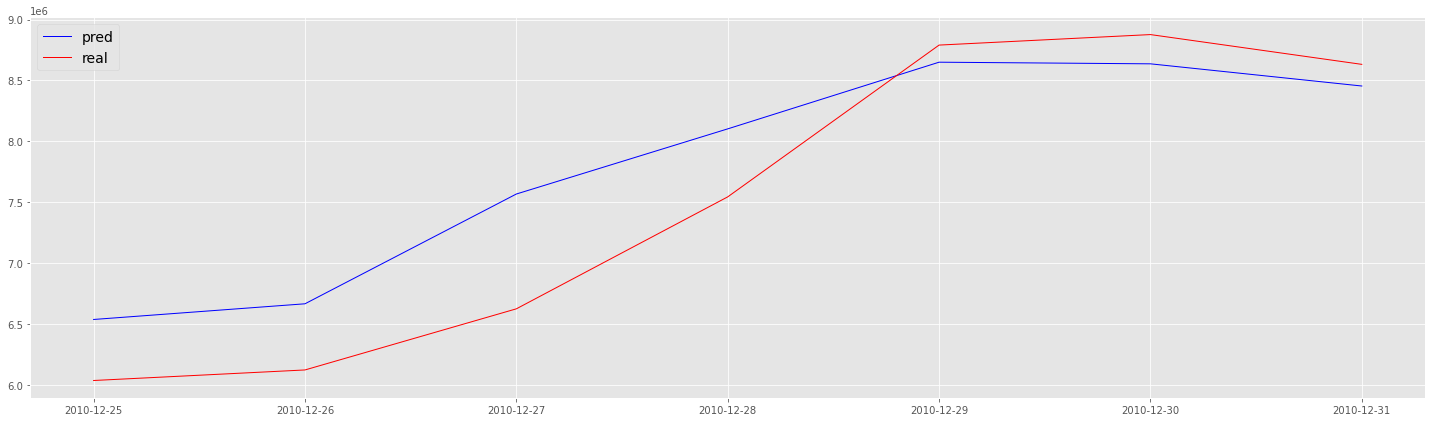

R^2: 0.8076153358882642
MAPE (средняя относительная ошибка прогноза) = 6.452185299124936


In [127]:
d1=df[(df.index < 730) & (df.index > 722)]
fig = plt.figure(figsize=(25, 7))
X2 = X[(X.index < 730) & (X.index > 722)]
y2 = df[(df.index < 730) & (df.index > 722)]['VALUE']
plt.plot(d1['DATE'], model.predict(X2), 'b', linewidth=1, label='pred')
plt.plot(d1['DATE'], y2, 'r', linewidth=1, label='real')
plt.legend(prop={'size': 14})
plt.show()
print ('R^2: {0}'.format(model.score(X2, y2)))
print("MAPE (средняя относительная ошибка прогноза) =", mean_absolute_percentage_error(y2, model.predict(X2)))